# Myocardial Infraction Complications Analysis

## 0. Introduction

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [114]:
data = pd.read_csv("MI.data", header=None)
data.columns = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_NA", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
data.replace("?", np.NaN, inplace=True)
data = data.apply(pd.to_numeric, errors = "coerce")
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


## 1. Train-Validation-Test Split

In [115]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:112]
y = [data["ZSN"], data["FIBR_PREDS"], data["P_IM_STEN"], data["REC_IM"], data["OTEK_LANC"]]

X_train, X_val, X_test, y_train, y_val, y_test = [], [], [], [], [], []

# ! Caution
# i = 0 => ZSN or Chronic heart failure
# i = 1 => FIBR_PREDS or Atrial fibrillation
# i = 2 => P_IM_STEN or Post-infarction angina
# i = 3 => REC_IM or Relapse of the myocardial infarction
# i = 4 => OTEK_LANC or Pulmonary edema

for i in range(len(y)):
    # Separate train/test split for each target variable
    # Split the data into train and temporary sets
    X_train_i, X_temp_i, y_train_i, y_temp_i = train_test_split(X, y[i], train_size=0.7, random_state=0, shuffle = False)
    
    # Split the temporary set into validation and test sets
    X_val_i, X_test_i, y_val_i, y_test_i = train_test_split(X_temp_i, y_temp_i, train_size=0.5, random_state=0, shuffle = False)
    X_train.append(X_train_i)
    X_val.append(X_val_i)
    X_test.append(X_test_i)
    y_train.append(y_train_i)
    y_val.append(y_val_i)
    y_test.append(y_test_i)


In [116]:
# Check the number of samples in each set and print as a table
results = {"Set": ["Train", "Validation", "Test"]}
for i in range(len(y)):
    results[f"y{i}"] = [len(y_train[i]), len(y_val[i]), len(y_test[i])]
results = pd.DataFrame(results)
results

,Set,y0,y1,y2,y3,y4
0,Train,1190,1190,1190,1190,1190
1,Validation,255,255,255,255,255
2,Test,255,255,255,255,255


## 2. EDA

In [117]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [118]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### Target Balance Check

In [119]:
# The number of instances in the dataset
number_of_instances = len(data)
# Create a table to show the balance of each target variable
results = {"Target": [], "0": [], "1": []}
for i in range(len(y)):
    results["Target"].append(f"y{i}")
    results["0"].append(y[i].value_counts()[0] / number_of_instances)
    results["1"].append(y[i].value_counts()[1] / number_of_instances)
results = pd.DataFrame(results)
results

,Target,0,1
0,y0,0.768235,0.231765
1,y1,0.900000,0.100000
2,y2,0.912941,0.087059
3,y3,0.906471,0.093529
4,y4,0.906471,0.093529


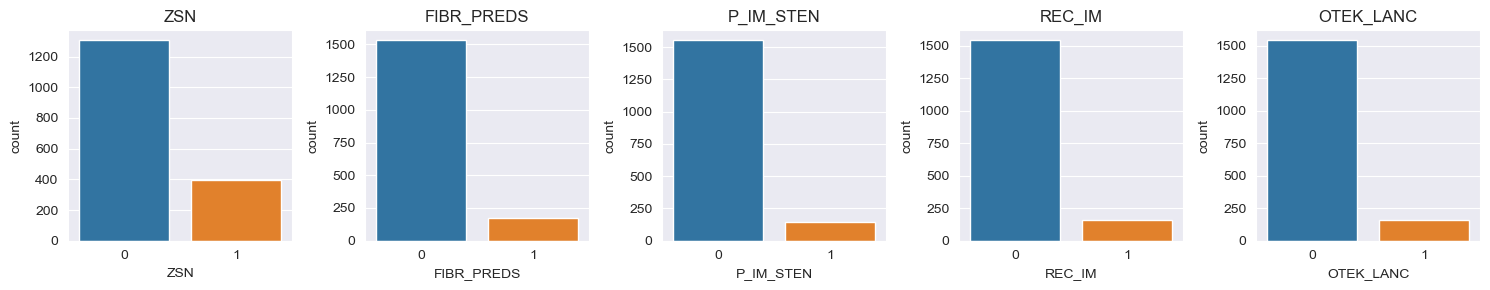

In [120]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

sns.countplot(x='ZSN', data=data, ax=axs[0])
axs[0].set_title('ZSN')

sns.countplot(x='FIBR_PREDS', data=data, ax=axs[1])
axs[1].set_title('FIBR_PREDS')

sns.countplot(x='P_IM_STEN', data=data, ax=axs[2])
axs[2].set_title('P_IM_STEN')

sns.countplot(x='REC_IM', data=data, ax=axs[3])
axs[3].set_title('REC_IM')

sns.countplot(x='OTEK_LANC', data=data, ax=axs[4])
axs[4].set_title('OTEK_LANC')

plt.tight_layout()
plt.show()

### Check for missing values

In [121]:
# Create a table representing number of missing values of each feature, sort them descendingly
missing_values = X.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values, columns=["Number of Missing Values"])
missing_values


,Number of Missing Values
KFK_BLOOD,1696
IBS_NASL,1628
D_AD_KBRIG,1076
S_AD_KBRIG,1076
NOT_NA_KB,686
...,...
zab_leg_06,7
zab_leg_04,7
NA_R_1_n,5
INF_ANAM,4


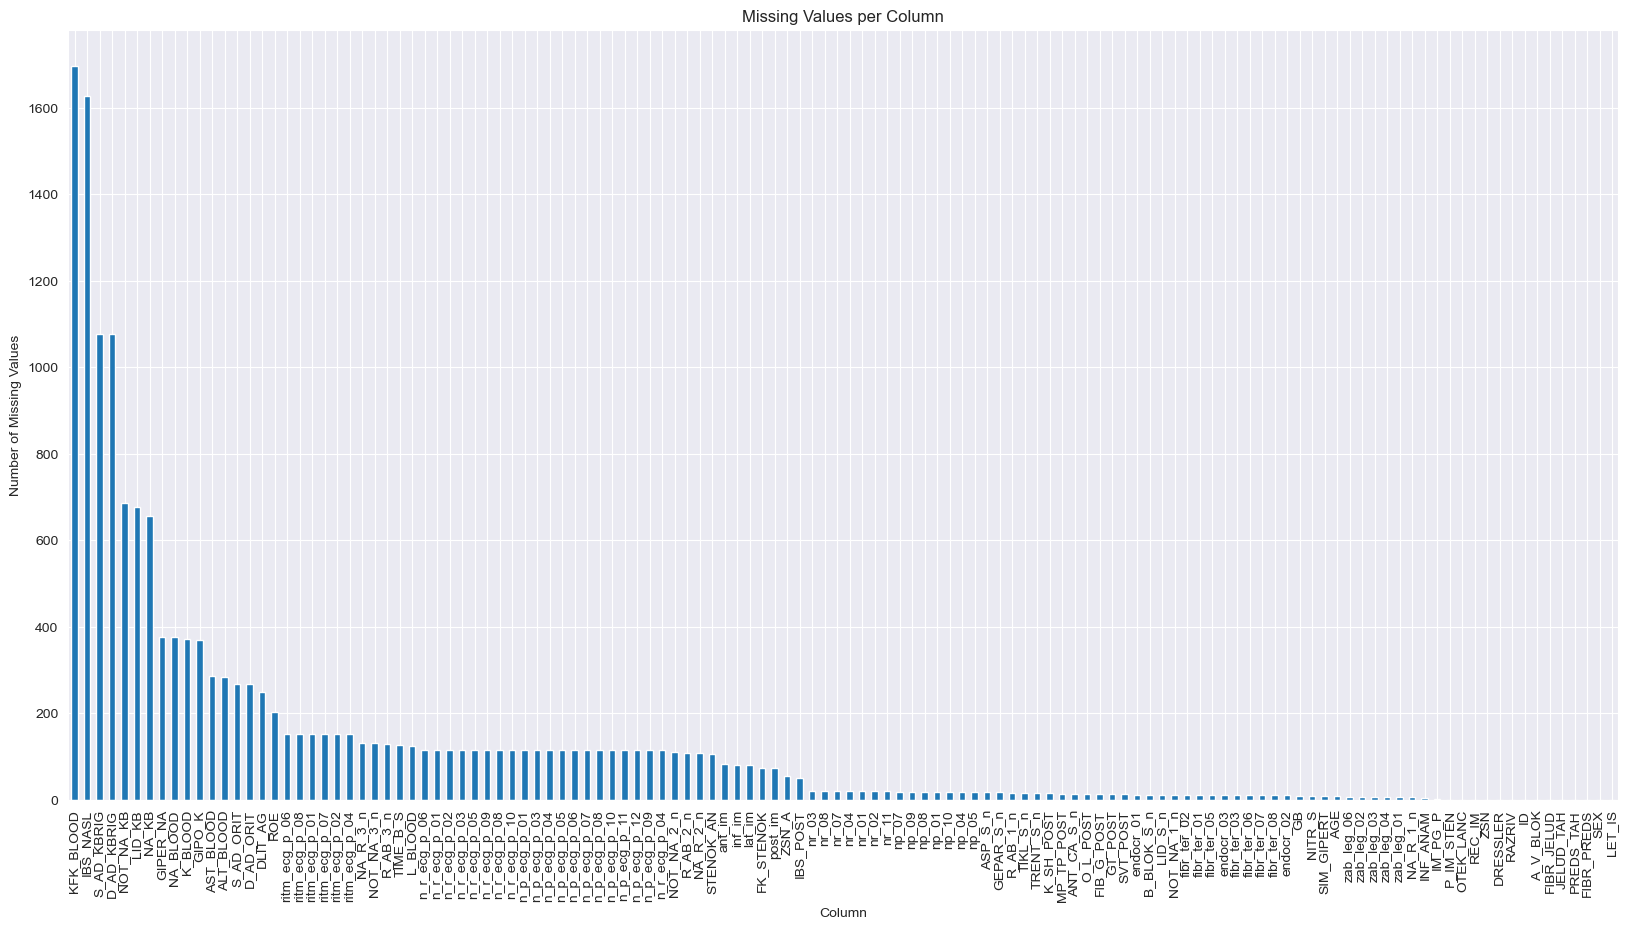

In [122]:
# Draw a bar chart to show the number of missing values of each feature, sort them descendingly and save as pdf file
missing_counts = data.isnull().sum()

# Sort missing counts (optional)
missing_counts = missing_counts.sort_values(ascending=False)

# Create the bar plot
missing_counts.plot.bar(figsize=(20, 10))  # Adjust figure size as desired
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.savefig("missing_values.pdf")
plt.show()

Total of 1700 entries but
<br>some features are <b>missing a few entries</b> => <b>keep by filling missing values</b>
<br>some features are <b>missing lots of entries</b> such as "IBS_NASL", "S_AD_KBRIG" and etc => <b>drop</b>

### Data Information of Feature

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB


In [124]:
X.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1690.000000,1590.000000,1569.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.331953,0.113208,0.084767,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.628311,0.399514,0.355107,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"]
categorical_features = ["INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "GIPER_NA", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n"]

### Data Distribution

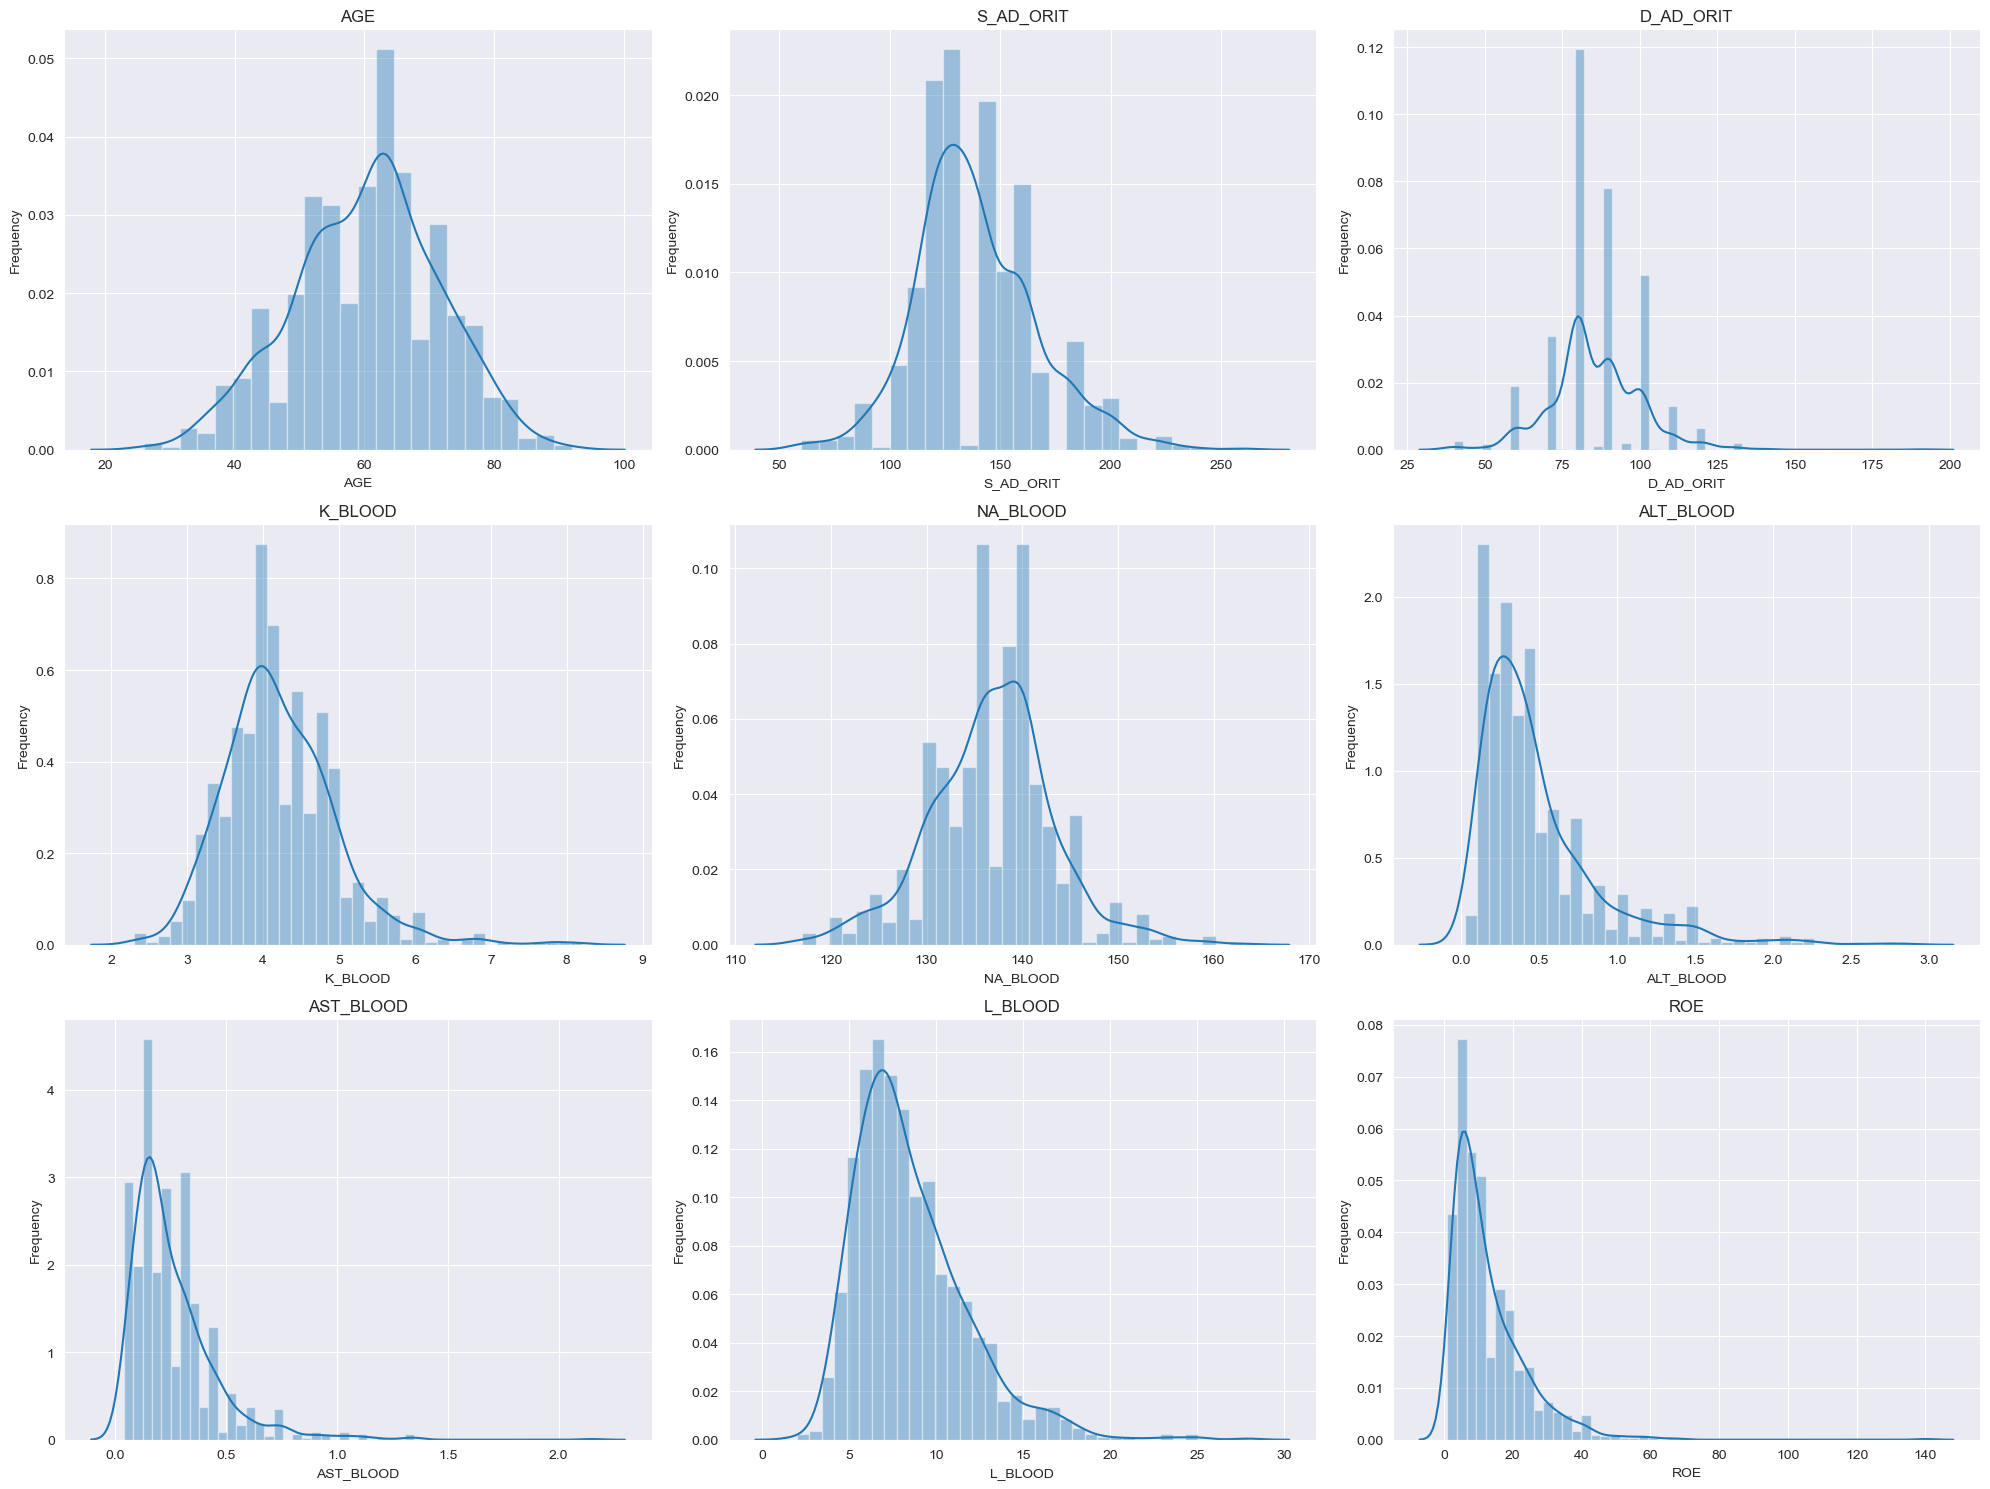

In [126]:
rows, cols = 3, 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

for i in range(rows):
    for j in range(cols):
        if i * cols + j >= len(continuous_features):
            break
        ax = axes[i, j]
        feature_name = continuous_features[i * cols + j]
        sns.distplot(X_train[0][feature_name], ax=ax)
        ax.set_title(feature_name)
        ax.set_xlabel(feature_name)
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [127]:
for continuous_feature in continuous_features:
    skew_value = abs(X_train[0][continuous_feature].skew())
    print(f"{continuous_feature} skew: {skew_value}")

AGE skew: 0.15108305442457992
S_AD_ORIT skew: 0.5409602704221258
D_AD_ORIT skew: 0.5503704578194044
K_BLOOD skew: 1.006181101800303
NA_BLOOD skew: 0.04373144416584097
ALT_BLOOD skew: 2.1427276814427985
AST_BLOOD skew: 2.6450289454994618
L_BLOOD skew: 1.358850262629433
ROE skew: 2.8319741042642663


if -0.5 < skew < 0.5 => good, it's almost normal dist
else skew left/right
<br>Age: normal
<br>S_AD_ORIT: skewed
<br>D_AD_ORIT: skewed
<br>K_BLOOD: skewed
<br>NA_BLOOD: normal
<br>ALT_BLOOD: skewed
<br>AST_BLOOD: skewed
<br>L_BLOOD: skewed
<br>ROE: skewed

### Check for outliers


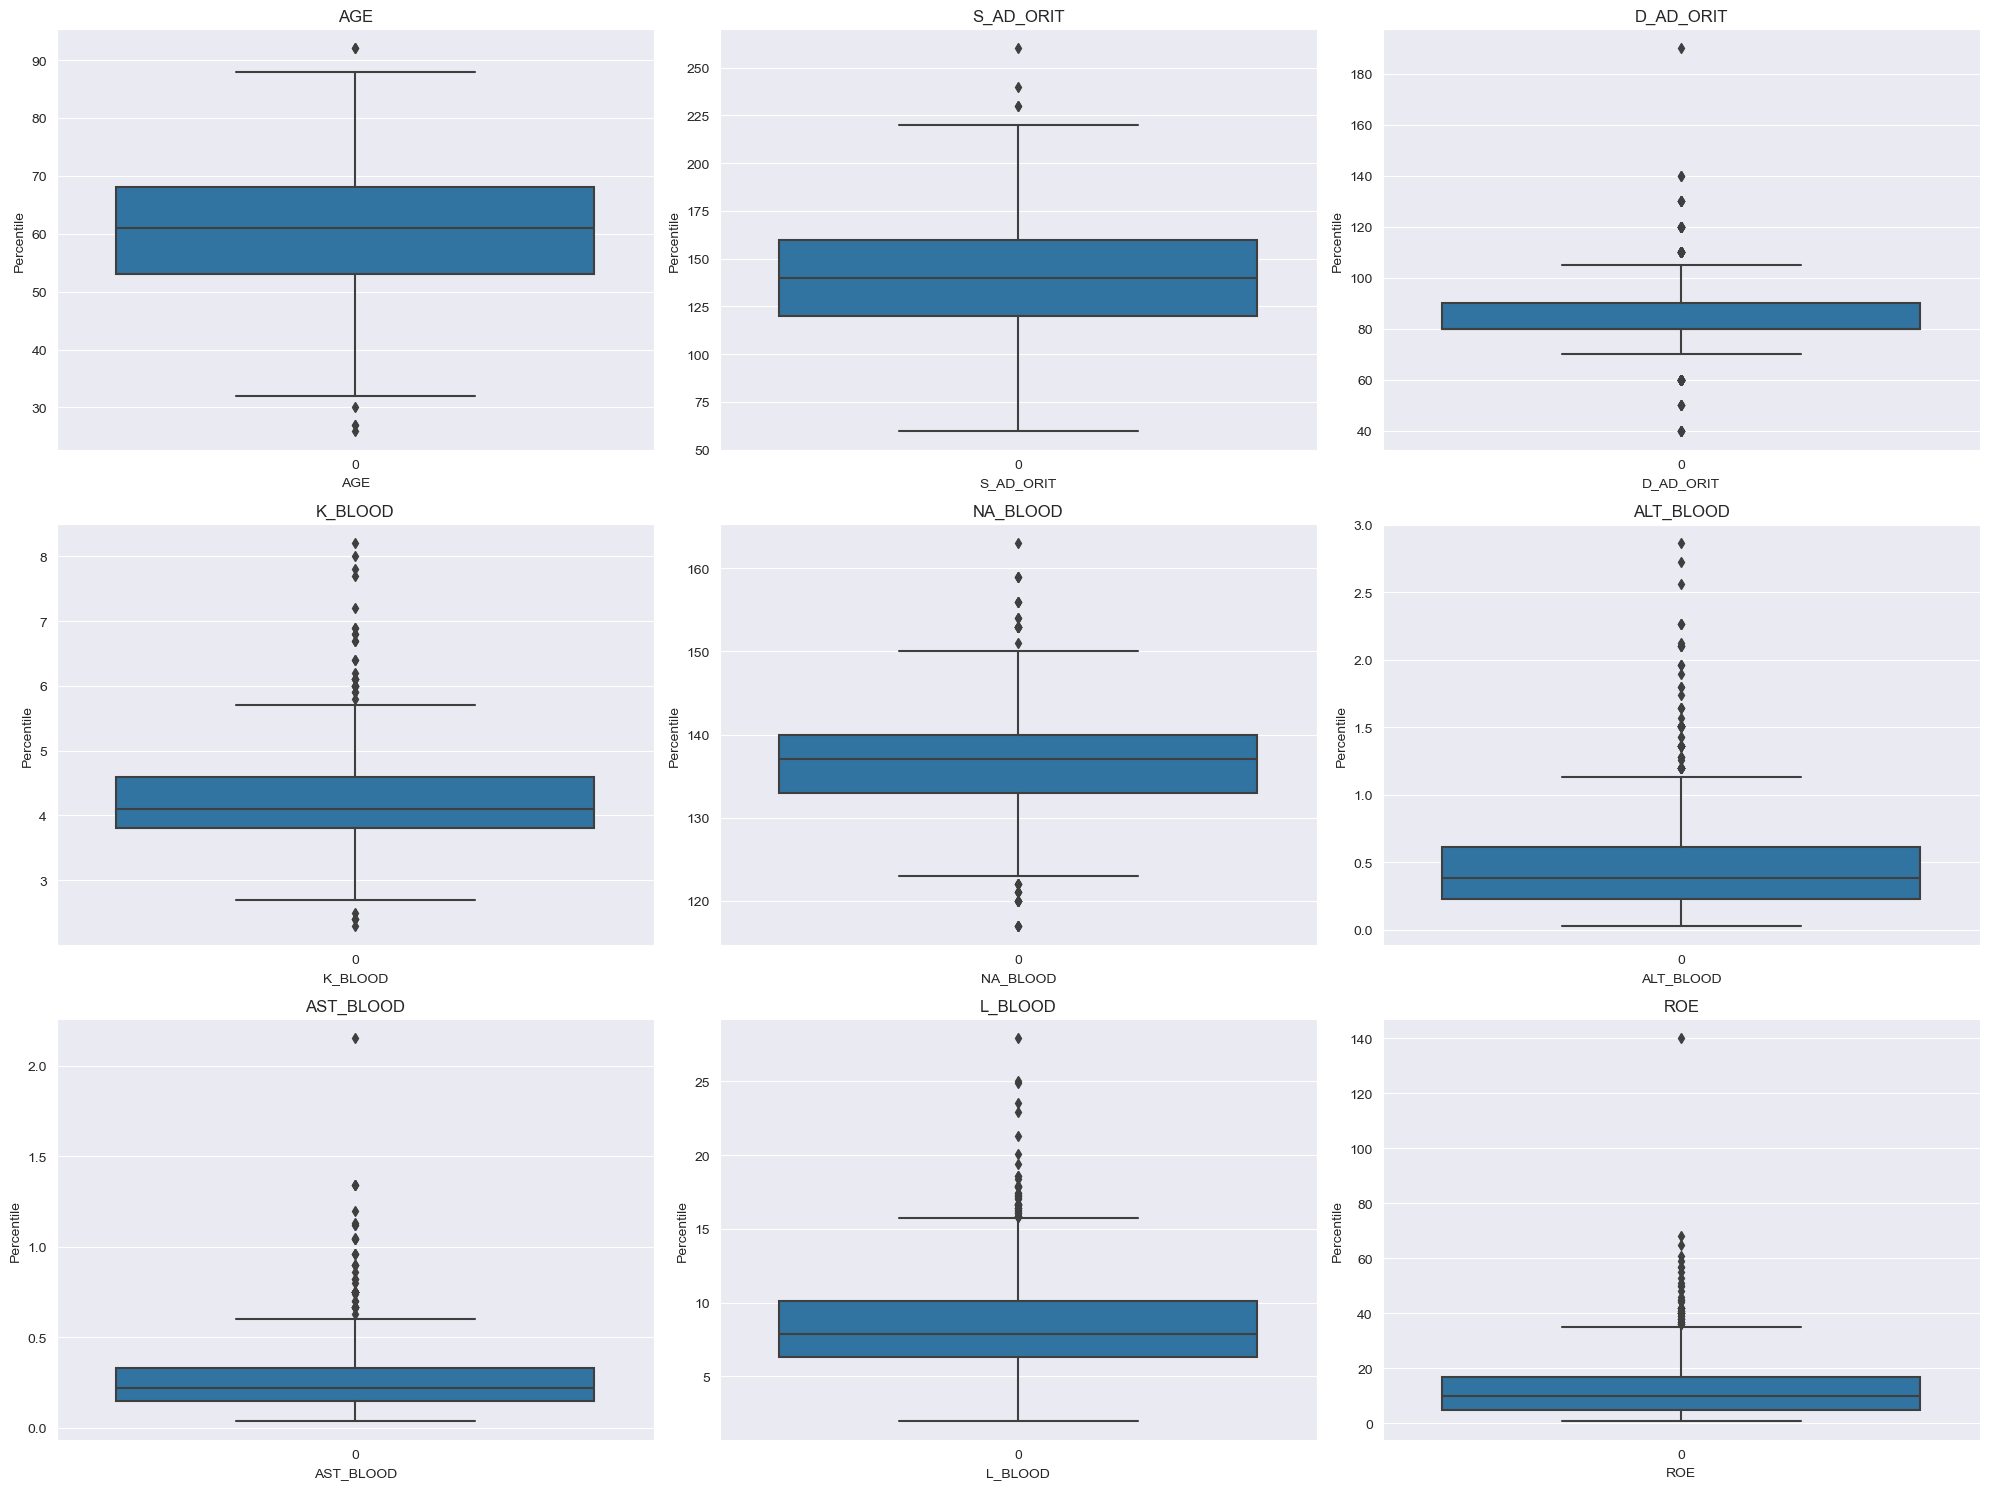

In [128]:
rows, cols = 3, 3 # To check all, use 11, 10

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

for i in range(rows):
    for j in range(cols):
        if i * cols + j >= len(continuous_features): # to check all, use X_train[0]
            break
        ax = axes[i, j]
        feature_name = continuous_features[i * cols + j]
        sns.boxplot(X_train[0][feature_name], ax=ax)
        ax.set_title(feature_name)
        ax.set_xlabel(feature_name)
        ax.set_ylabel('Percentile')

plt.tight_layout()
plt.show()

### Correlation Matrix


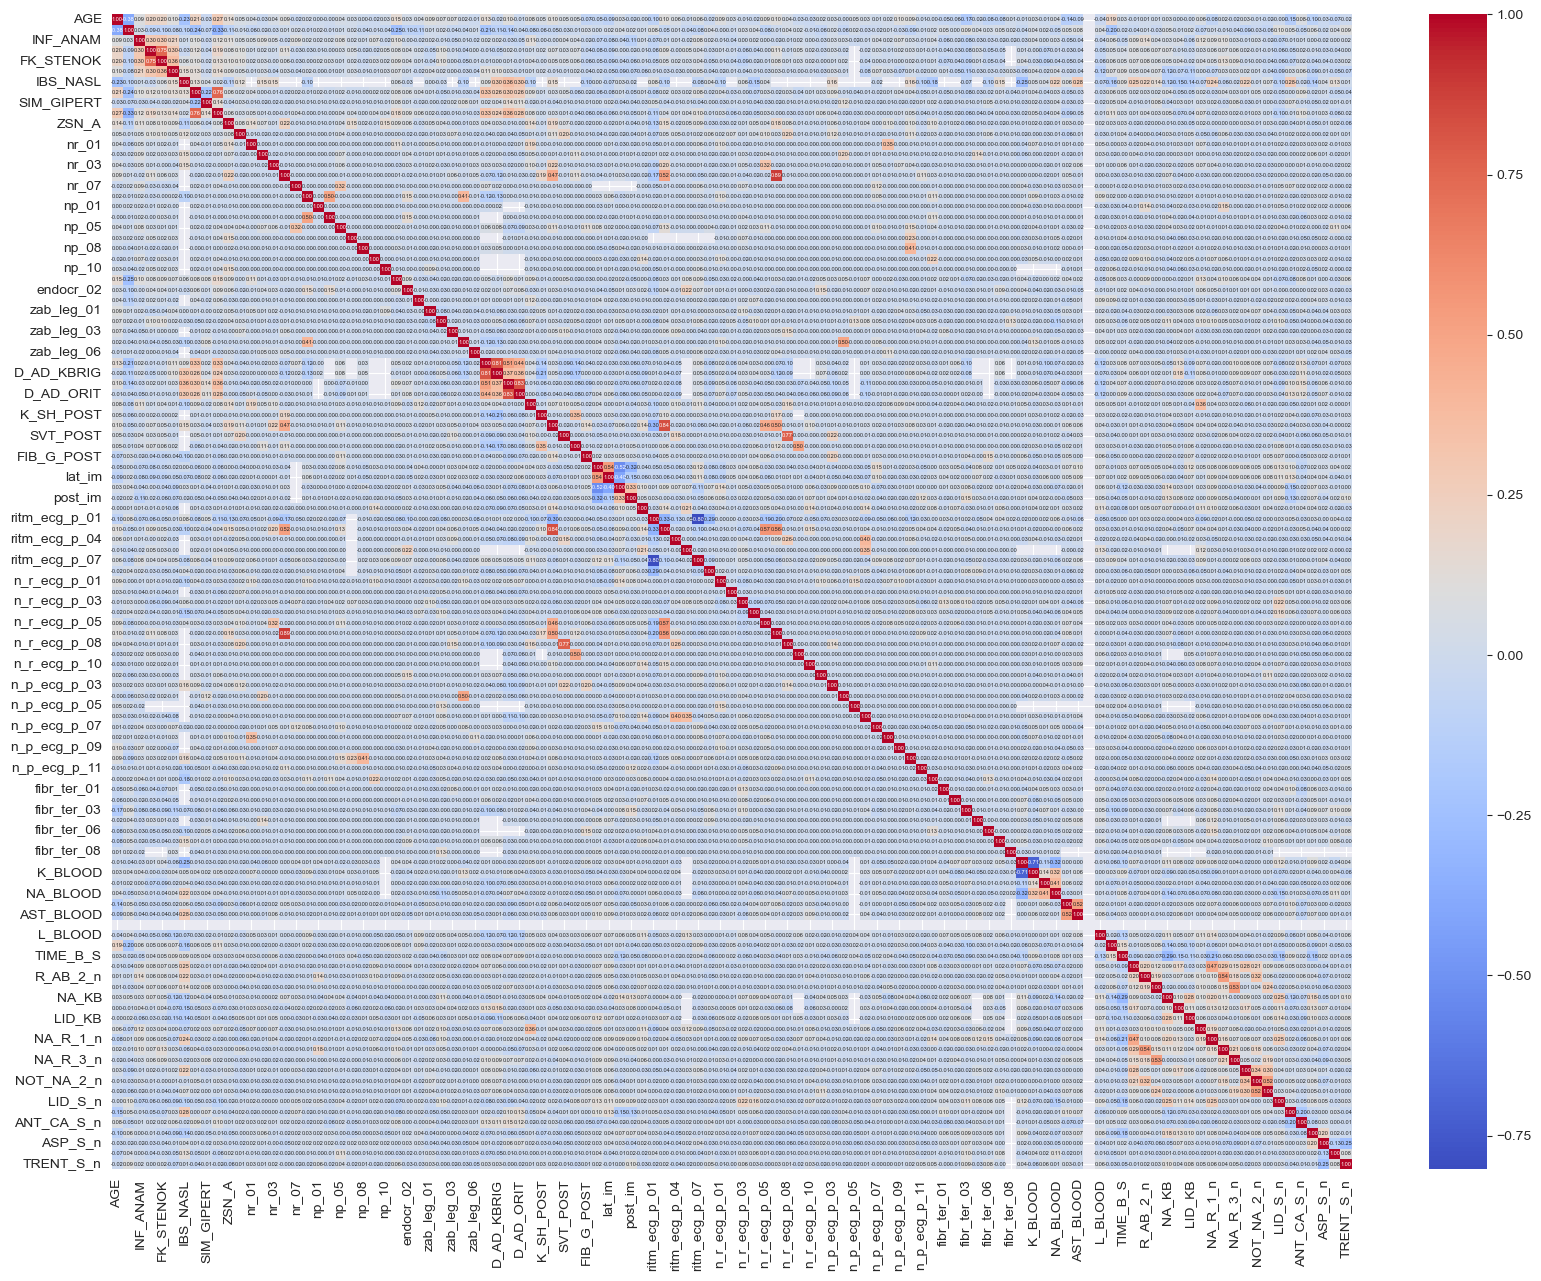

In [129]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train[0].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 4})  # Adjust size as needed
plt.savefig('heatmap.pdf', format='pdf')  # Save the plot as a PDF file
plt.show()

## 3. Preprocessing

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='mean')),  # Fill missing values using mean
    ('scaling', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Apply the preprocessing pipeline to each set
for i in range(len(y)):
    X_train[i] = preprocessing_pipeline.fit_transform(X_train[i])
    X_val[i] = preprocessing_pipeline.transform(X_val[i])
    X_test[i] = preprocessing_pipeline.transform(X_test[i])

## 4. Model Selection

In [131]:

# write the section using Decision Tree, Random Forest, SVM, Logistic Regression using sklearn.pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "SVM": SVC(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0)
}

# Train the models and print the results as a table
results = {"Model": [], "ZSN": [], "FIBR_PREDS": [], "P_IM_STEN": [], "REC_IM": [], "OTEK_LANC": []}
for model_name, model in models.items():
    model.fit(X_train[0], y_train[0])
    y_pred = model.predict(X_val[0])
    results["Model"].append(model_name)
    results["ZSN"].append(accuracy_score(y_val[0], y_pred))
    
    model.fit(X_train[1], y_train[1])
    y_pred = model.predict(X_val[1])
    results["FIBR_PREDS"].append(accuracy_score(y_val[1], y_pred))
    
    model.fit(X_train[2], y_train[2])
    y_pred = model.predict(X_val[2])
    results["P_IM_STEN"].append(accuracy_score(y_val[2], y_pred))
    
    model.fit(X_train[3], y_train[3])
    y_pred = model.predict(X_val[3])
    results["REC_IM"].append(accuracy_score(y_val[3], y_pred))
    
    model.fit(X_train[4], y_train[4])
    y_pred = model.predict(X_val[4])
    results["OTEK_LANC"].append(accuracy_score(y_val[4], y_pred))

results = pd.DataFrame(results)
results

,Model,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC
0,Decision Tree,0.670588,0.729412,0.690196,0.725490,0.701961
1,Random Forest,0.768627,0.737255,0.737255,0.803922,0.776471
2,SVM,0.760784,0.733333,0.737255,0.803922,0.776471
3,Logistic Regression,0.698039,0.737255,0.733333,0.788235,0.760784


## 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
param_grids = {
    "Decision Tree": {
        "max_depth": [5, 10, 15, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 15, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "gamma": [0.1, 1, 10]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10]
    }
}

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "SVM": SVC(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0)
}

# Train the models with hyperparameter tuning
best_models = {}
for model_name in models.keys():
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train[0], y_train[0])
    best_models[model_name] = grid_search.best_estimator_
    
    grid_search.fit(X_train[1], y_train[1])
    best_models[model_name] = grid_search.best_estimator_
    
    grid_search.fit(X_train[2], y_train[2])
    best_models[model_name] = grid_search.best_estimator_
    
    grid_search.fit(X_train[3], y_train[3])
    best_models[model_name] = grid_search.best_estimator_
    
    grid_search.fit(X_train[4], y_train[4])
    best_models[model_name] = grid_search.best_estimator_
    
best_models


## 6. Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the best models on the test set
for i in range(len(y)):
    model = best_models["Decision Tree"]
    y_pred = model.predict(X_test[i])
    print(f"y{i} Decision Tree:")
    print(classification_report(y_test[i], y_pred))
    
    model = best_models["Random Forest"]
    y_pred = model.predict(X_test[i])
    print(f"y{i} Random Forest:")
    print(classification_report(y_test[i], y_pred))
    
    model = best_models["SVM"]
    y_pred = model.predict(X_test[i])
    print(f"y{i} SVM:")
    print(classification_report(y_test[i], y_pred))
    
    model = best_models["Logistic Regression"]
    y_pred = model.predict(X_test[i])
    print(f"y{i} Logistic Regression:")
    print(classification_report(y_test[i], y_pred))
